# Lasso and Ridge Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [4]:
boston_dataset = datasets.load_boston()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [6]:
import warnings
warnings.filters

[('always', None, scipy.special._sf_error.SpecialFunctionWarning, None, 0),
 ('ignore',
  re.compile(r'the matrix subclass is not the recommended way',
             re.IGNORECASE|re.UNICODE),
  Warning,
  None,
  0),
 ('ignore',
  re.compile(r'numpy.ndarray size changed', re.IGNORECASE|re.UNICODE),
  Warning,
  None,
  0),
 ('ignore',
  re.compile(r'numpy.ufunc size changed', re.IGNORECASE|re.UNICODE),
  Warning,
  None,
  0),
 ('ignore',
  re.compile(r'numpy.dtype size changed', re.IGNORECASE|re.UNICODE),
  Warning,
  None,
  0),
 ('always', None, numpy.RankWarning, None, 0),
 ('error', None, IPython.core.completer.ProvisionalCompleterWarning, None, 0),
 ('default', None, DeprecationWarning, '__main__', 0),
 ('ignore', None, DeprecationWarning, None, 0),
 ('ignore', None, PendingDeprecationWarning, None, 0),
 ('ignore', None, ImportWarning, None, 0),
 ('ignore', None, ResourceWarning, None, 0)]

In [12]:
df = pd.read_csv('D:\\AIML\\ML\\data\\boston_house_prices.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


getting dependant and independent values

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

splitting data into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### using linear regression

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

checking accuracy

In [16]:
lin_reg.score(X_train,y_train) # train set

0.7730135569264234

In [18]:
lin_reg.score(X_test,y_test) # test values

0.5892223849182503

finding coefficients

In [33]:
coeffecient_df = pd.DataFrame()
coeffecient_df['Columns'] = X.columns
#coeffecient_df['coeffecient value'] = lin_reg.coef_
coeffecient_df['coeffecient value linear'] = pd.Series(lin_reg.coef_)
coeffecient_df

,Columns,coeffecient value linear
0,CRIM,-0.119443
1,ZN,0.044780
2,INDUS,0.005485
3,CHAS,2.340804
4,NOX,-16.123604
5,RM,3.708709
6,AGE,-0.003121
7,DIS,-1.386397
8,RAD,0.244178
9,TAX,-0.010990


plotting this as graph

<BarContainer object of 13 artists>

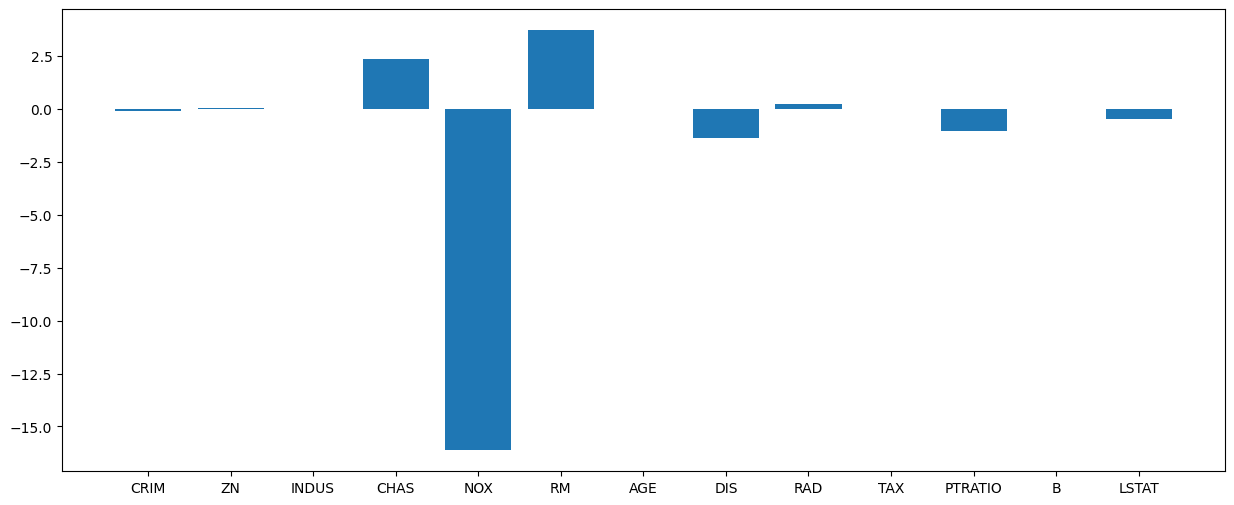

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,6)
plt.bar(coeffecient_df['Columns'],coeffecient_df['coeffecient value linear'])

### using L1 Lasso model

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.5)

In [36]:
lasso_reg.score(X_train,y_train)

0.7494377584575025

In [38]:
lasso_reg.score(X_test,y_test)

0.5357483878447478

In [48]:
coeffecient_df['coeffecient value Lasso'] = lasso_reg.coef_
coeffecient_df

,Columns,coeffecient value linear,coeffecient value Lasso
0,CRIM,-0.119443,-0.088968
1,ZN,0.044780,0.050331
2,INDUS,0.005485,-0.018970
3,CHAS,2.340804,0.000000
4,NOX,-16.123604,-0.000000
5,RM,3.708709,2.312126
6,AGE,-0.003121,0.000000
7,DIS,-1.386397,-0.904291
8,RAD,0.244178,0.208320
9,TAX,-0.010990,-0.013685


<BarContainer object of 13 artists>

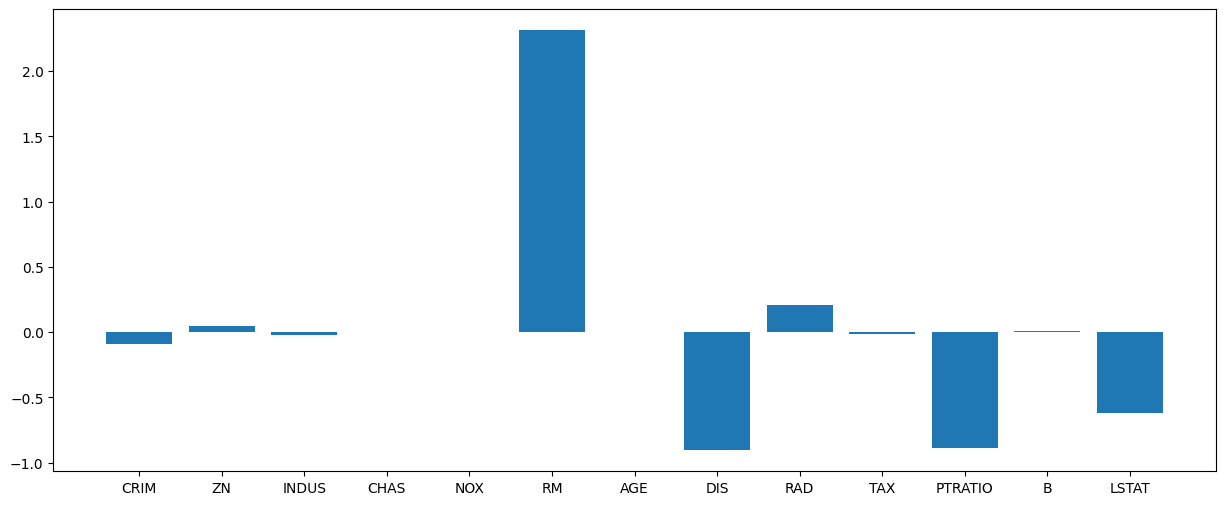

In [51]:
plt.bar(coeffecient_df['Columns'],coeffecient_df['coeffecient value Lasso'])

### using L2 Ridge regression

In [52]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.5)

In [55]:
ridge_reg.score(X_train,y_train)

0.7722090017398455

In [56]:
lin_reg.score(X_train,y_train)

0.7730135569264234

In [53]:
coeffecient_df['coeffecient value ridge'] = ridge_reg.coef_
coeffecient_df

,Columns,coeffecient value linear,coeffecient value Lasso,coeffecient value ridge
0,CRIM,-0.119443,-0.088968,-0.117713
1,ZN,0.044780,0.050331,0.045548
2,INDUS,0.005485,-0.018970,-0.013641
3,CHAS,2.340804,0.000000,2.312565
4,NOX,-16.123604,-0.000000,-11.179039
5,RM,3.708709,2.312126,3.744458
6,AGE,-0.003121,0.000000,-0.007933
7,DIS,-1.386397,-0.904291,-1.316764
8,RAD,0.244178,0.208320,0.229469
9,TAX,-0.010990,-0.013685,-0.011329


<BarContainer object of 13 artists>

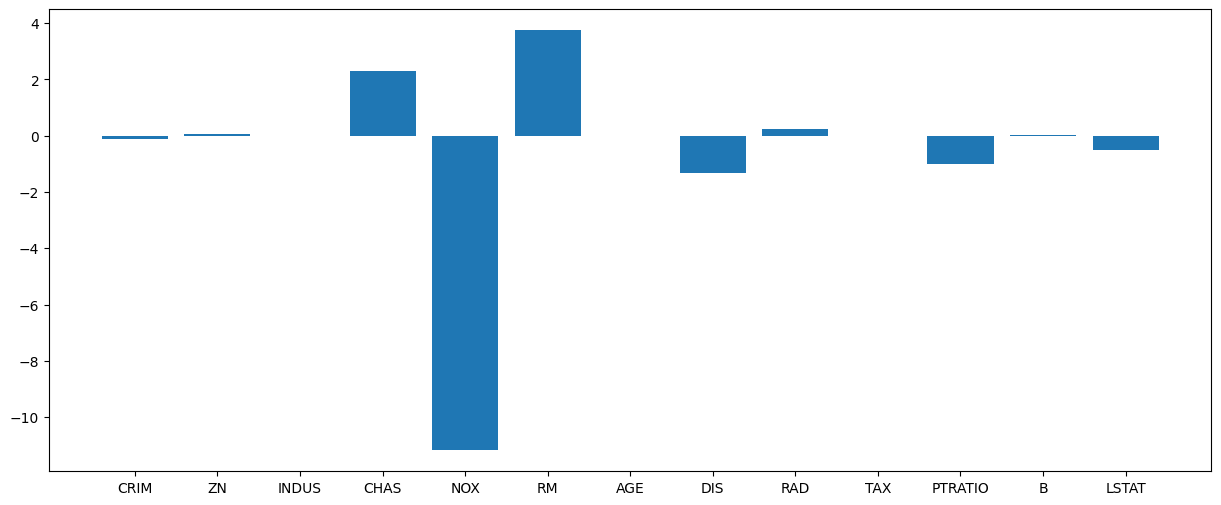

In [54]:
plt.bar(coeffecient_df['Columns'],coeffecient_df['coeffecient value ridge'])

### comparison

['linear reg train' 'Lasso train' 'Ridge train' 'linear reg test'
 'Lasso test' 'Ridge test']

[0.77301356 0.74943776 0.772209   0.58922238 0.53574839 0.58364982]


<BarContainer object of 6 artists>

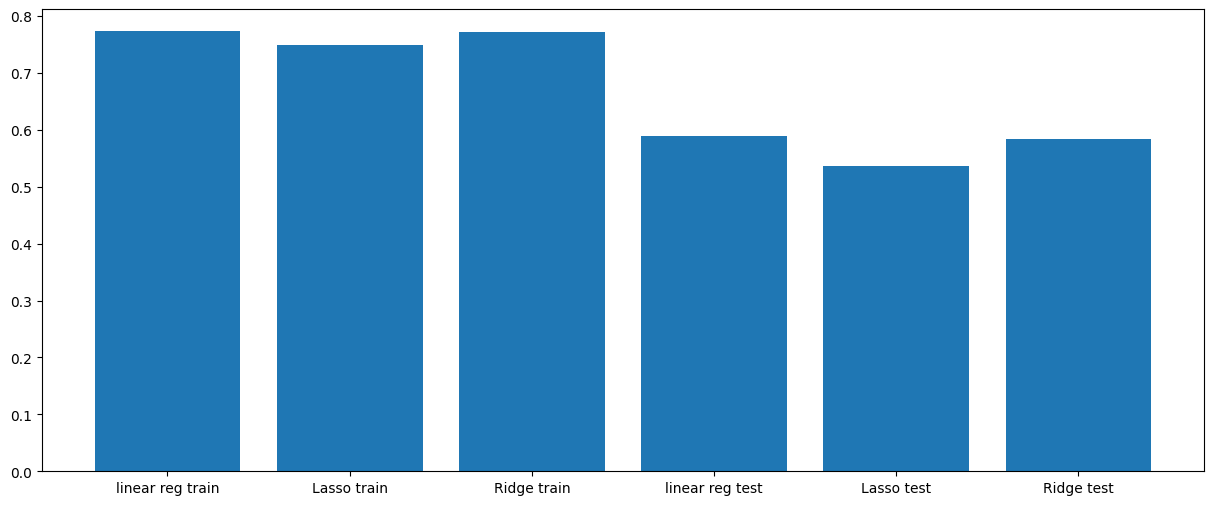

In [84]:
x = np.array(['linear reg train','Lasso train','Ridge train',
             'linear reg test','Lasso test','Ridge test'])
y = np.array([lin_reg.score(X_train,y_train),lasso_reg.score(X_train,y_train),ridge_reg.score(X_train,y_train),
             lin_reg.score(X_test,y_test),lasso_reg.score(X_test,y_test),ridge_reg.score(X_test,y_test)])
print(x,y,sep='\n\n')
plt.bar(x,y,)

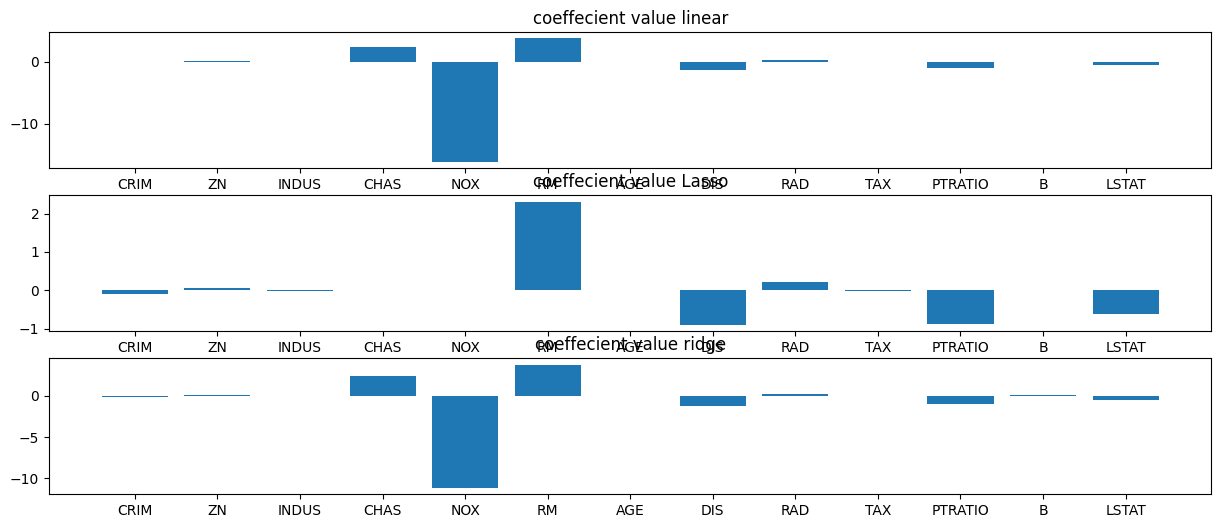

In [93]:
value = ['coeffecient value linear','coeffecient value Lasso','coeffecient value ridge']
for i in range(3):
    plt.tight_layout
    plt.subplot(3,1,i+1)
    plt.title(value[i],)
    plt.bar(coeffecient_df['Columns'],coeffecient_df[value[i]])